# An overview of ANOVA
The intuition behind ANOVA is to compare the variability between different groups with the variability within the groups. If they are comparable, then the differences between groups are more likely to be due to sampling variability. On the other hand, if the variability between groups is much larger than the variability expected from the samples within their respective groups, then those groups are probably drawn from significantly different subpopulations.

The variation between groups and within groups is calculated as sums of squares, which are then expressed as a ratio. This ratio is known as the F-statistic. The formula for each component of these calculations is presented in the worked example that follows.

Previously, you learned about one-way and two-way ANOVA. To review:

$One-way ANOVA$: Compares the means of one continuous dependent variable based on three or more groups of one categorical variable

$Two-way ANOVA$: Compares the means of one continuous dependent variable based on three or more groups of two categorical variables

ANOVA tests are statistical tests that examine whether or not the means of a continuous dependent variable are significantly different from one another based on the different levels of one or more independent categorical variables. 

It is sufficient for one group’s mean to be significantly different from the others to reject the null hypothesis; however, ANOVA testing is limited in that it doesn’t tell you which group is different. To make such a determination, other tests are necessary. 

ANOVA works by comparing the variance between each group to the variance within each group. The greater the ratio of variance between groups to variance within groups, the greater the likelihood of rejecting the null hypothesis.

ANOVA depends on certain assumptions, so it is important to check that your data meets them in order to avoid drawing false conclusions. At the very least, if your data does not meet all of them, identify these violations.

In [1]:
# Import pandas and seaborn packages
import pandas as pd
import seaborn as sns

I will be performing ANOVA on an inbuilt dataset that seaborn library has with it. Mark cache as true, this will save the dataset on your local machine, internet connectivity is required for the first time to load the dataset

In [2]:
# Load in diamonds data set from seaborn package
diamonds = sns.load_dataset("diamonds", cache=True)

# Examine first 5 rows of data set
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
diamonds['color'].value_counts()
# Check how many diamonds are each color grade

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [4]:
colorless = diamonds[diamonds['color'].isin(['E','F','H','D','I'])]
# Select only color and price columns, and reset index
colorless = colorless[["color","price"]].reset_index(drop=True)

***Note:***

We took a subset of colorless and near colorless diamonds. We excluded G color grade diamonds as there were many more of them, and we excluded J color grade diamonds as there were significantly fewer of them. In a workplace setting, you would typically go through a more `thoughtful` process of subsetting. The goal of this notebook is focusing on` ANOVA` , not data cleaning or variable selection.

In [5]:
# Remove dropped categories of diamond color
colorless.color = colorless.color.cat.remove_categories(["G","J"])

# Check that the dropped categories have been removed
colorless["color"].values

['E', 'E', 'E', 'I', 'I', ..., 'D', 'D', 'D', 'H', 'D']
Length: 39840
Categories (5, object): ['D', 'E', 'F', 'H', 'I']

In [6]:
# Import math package
import math

# Take the logarithm of the price, and insert it as the third column
colorless.insert(2, "log_price", [math.log(price) for price in colorless["price"]])

**Note:** The first argument in the `insert()` function allows you to specify the location of the new column with a column number. But the argument starts counting at 0. So if you put in 0, that is the first column; if you enter 1, that is the second column, and so on. Since we specified 2, the new `log_price` column will be the third column.

Next, we use the `dropna()` function to drop the rows with missing values. Setting the `inplace` argument to `True` means that we do not have to save the dataframe as a new variable. Then, we'll reset the index using the `reset_index()` function to reset the index column to account for the rows we just dropped. The `inplace` argument works the same as it did for the `dropna()` function, and the `drop` argument prevents us from creating a new column with the old index numbers preserved.

In [7]:
# Drop rows with missing values
colorless.dropna(inplace=True)

# Reset index
colorless.reset_index(inplace=True, drop=True)

In [8]:
# Examine first 5 rows of cleaned data set
colorless.head()

,color,price,log_price
0,E,326,5.786897
1,E,326,5.786897
2,E,327,5.789960
3,I,334,5.811141
4,I,336,5.817111


In [9]:
# Save to diamonds.csv

colorless.to_csv('diamonds.csv',index=False,header=list(colorless.columns))
#**Note:** The code creates a new .csv file of the `colorless` dataframe, and names it `diamonds.csv`. The `index` argument 
#tells the function whether or not we want to save the index column as a column in the .csv file. Additionally, the `header`
#argument tells the function what the names of the columns should be.

# One-way ANOVA

In [10]:
# Save diamonds.csv as a variable called diamonds
diamonds = pd.read_csv("diamonds.csv")

In [11]:
# Examine first 5 rows of diamonds data set
diamonds.head()

,color,price,log_price
0,E,326,5.786897
1,E,326,5.786897
2,E,327,5.789960
3,I,334,5.811141
4,I,336,5.817111


one-way ANOVA helps us better understand the relationship between a categorical variable and a continuous variable. We'll do some basic exploratory data analysis by creating a boxplot using the `boxplot()` function

Based on the plot, we can observe that there is a lot of overlap in the distribution of `log_price` for each color of diamond. But we can't tell yet if they are statistically significantly different.

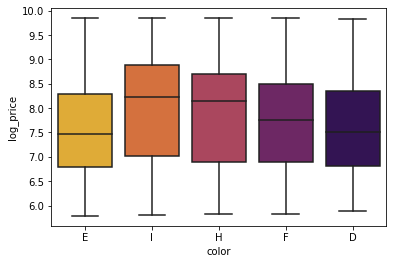

In [12]:
# Create boxplot to show distribution of price by color grade

sns.boxplot(x = "color", y = "log_price", data = diamonds,palette='inferno_r')

# regression model. 

In [13]:
# Import statsmodels and ols function
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [14]:
model= ols( formula="log_price~C(color)",data=diamonds).fit()

In [15]:
# Get summary statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     265.0
Date:                Sat, 22 Feb 2025   Prob (F-statistic):          3.61e-225
Time:                        12:51:46   Log-Likelihood:                -56182.
No. Observations:               39840   AIC:                         1.124e+05
Df Residuals:                   39835   BIC:                         1.124e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.6169      0.012    632.421      0.000       7.593       7.641
C(color)[T.E]    -0.0375      0.016     -2.394      0.017      -0.068      -0.007
C(color)[T.F]     0.1455      0.016      9.240      0.000       0.115       0.176
C(color)[T.H]     0.3015      0.016     18.579      0.000       0.270       0.333
C(color)[T.I]     0.4061      0.018     22.479      0.000       0.371       0.441
==============================================================================
Omnibus:                     7112.992   Durbin-Watson:                   0.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1542.881
Skew:                           0.079   Prob(JB):                         0.00
Kurtosis:                       2.049   Cond. No.                         6.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Null Hypothesis

$$H_0: price_D=price_E=price_F=price_H=price_I$$
There is no difference in the price of diamonds based on color grade.
    
#### Alternative Hypothesis

$$H_1: \text{Not } price_D=price_E=price_F=price_H=price_I$$

There is a difference in the price of diamonds based on color grade.

 the function requires a fitted regression model, and for us to specify the type of ANOVA: 1, 2, or 3. 

In [16]:
# Run one-way ANOVA
sm.stats.anova_lm(model, typ = 2) # supply the regression model in the arguments

,sum_sq,df,F,PR(>F)
C(color),1041.690290,4.0,264.987395,3.609774e-225
Residual,39148.779822,39835.0,NaN,NaN


In [17]:
sm.stats.anova_lm(model, typ = 1)

,df,sum_sq,mean_sq,F,PR(>F)
C(color),4.0,1041.690290,260.422572,264.987395,3.609774e-225
Residual,39835.0,39148.779822,0.982773,NaN,NaN


In [18]:
sm.stats.anova_lm(model, typ = 3)

,sum_sq,df,F,PR(>F)
Intercept,393066.804852,1.0,399956.684283,0.000000e+00
C(color),1041.690290,4.0,264.987395,3.609774e-225
Residual,39148.779822,39835.0,NaN,NaN


**Technical note:** The type of an ANOVA and the number of ways of an ANOVA are two distinct concepts: "type" (`typ` in `statsmodels.stats.anova.anova_lm()`) refers to how the sums of squares (these quantities are the building blocks for ANOVA) are calculated, while "K-way" means that there are K categorical factors in the analysis.

In this part of the notebook, we will prepare a second dataset so we can perform a two-way ANOVA, which requires two categorical variables. We will start with the same diamonds dataset from the `seaborn` package.

In [19]:
# Import diamonds data set from seaborn package
diamonds = sns.load_dataset("diamonds", cache=True)

In [20]:
# Examine first 5 rows of data set
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


We start by selecting the columns of interest: `color`, `cut`, and `price`. Then, we subset only for certain color grades, and remove the dropped colors from the list of categories using the `remove_categories()` function.

Next, we subset for specific diamond cuts: `Ideal`, `Premium`, and `Very Good`, and remove the dropped cuts from the list of categories.

Next, we remove rows with missing data, and reset the index.

Lastly, we add in a column for the logarithm of the price.

In [21]:
# Subset for color, cut, price columns
diamonds2 = diamonds[["color","cut","price"]]

# Only include colorless diamonds
diamonds2 = diamonds2[diamonds2["color"].isin(["E","F","H","D","I"])]

# Drop removed colors, G and J
diamonds2.color = diamonds2.color.cat.remove_categories(["G","J"])

# Only include ideal, premium, and very good diamonds
diamonds2 = diamonds2[diamonds2["cut"].isin(["Ideal","Premium","Very Good"])]

# Drop removed cuts
diamonds2.cut = diamonds2.cut.cat.remove_categories(["Good","Fair"])

# Drop NaNs
diamonds2.dropna(inplace = True)

# Reset index
diamonds2.reset_index(inplace = True, drop = True)

# Add column for logarithm of price
diamonds2.insert(3,"log_price",[math.log(price) for price in diamonds2["price"]])

In [22]:
# Examine the data set
diamonds2.head()

,color,cut,price,log_price
0,E,Ideal,326,5.786897
1,E,Premium,326,5.786897
2,I,Premium,334,5.811141
3,I,Very Good,336,5.817111
4,H,Very Good,337,5.820083


In [23]:
# Save as diamonds2.csv
diamonds2.to_csv('diamonds2.csv',index=False,header=list(diamonds2.columns))

# Two-Way ANOVA

In [24]:
# Load the data set
diamonds2 = pd.read_csv("diamonds2.csv")

In [25]:
# Examine the first 5 rows of the data set
diamonds2.head()

,color,cut,price,log_price
0,E,Ideal,326,5.786897
1,E,Premium,326,5.786897
2,I,Premium,334,5.811141
3,I,Very Good,336,5.817111
4,H,Very Good,337,5.820083


In [26]:
# Construct a multiple linear regression with an interaction term between color and cut
model2 = ols(formula = "log_price ~ C(color) + C(cut) + C(color):C(cut)", data = diamonds2).fit()

**Note:** This regression model includes two categorical X variables: `color` and `cut`, and a variable to account for the interaction between `color` and `cut`. The interaction is denoted using the `:` symbol.

In [27]:
# Get summary statistics
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     119.5
Date:                Sat, 22 Feb 2025   Prob (F-statistic):               0.00
Time:                        12:51:49   Log-Likelihood:                -49159.
No. Observations:               34935   AIC:                         9.835e+04
Df Residuals:                   34920   BIC:                         9.847e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             7.4567      0.019    401.583      0.000       7.420       7.493
C(color)[T.E]                        -0.0056      0.024     -0.231      0.817      -0.053       0.042
C(color)[T.F]                         0.1755      0.024      7.166      0.000       0.128       0.224
C(color)[T.H]                         0.2756      0.026     10.739      0.000       0.225       0.326
C(color)[T.I]                         0.3787      0.028     13.294      0.000       0.323       0.435
C(cut)[T.Premium]                     0.2828      0.031      9.153      0.000       0.222       0.343
C(cut)[T.Very Good]                   0.2295      0.031      7.290      0.000       0.168       0.291
C(color)[T.E]:C(cut)[T.Premium]      -0.0322      0.040     -0.800      0.424      -0.111       0.047
C(color)[T.F]:C(cut)[T.Premium]       0.0313      0.040      0.775      0.438      -0.048       0.110
C(color)[T.H]:C(cut)[T.Premium]       0.0947      0.041      2.308      0.021       0.014       0.175
C(color)[T.I]:C(cut)[T.Premium]       0.0841      0.046      1.832      0.067      -0.006       0.174
C(color)[T.E]:C(cut)[T.Very Good]    -0.0931      0.041     -2.294      0.022      -0.173      -0.014
C(color)[T.F]:C(cut)[T.Very Good]    -0.1013      0.041     -2.459      0.014      -0.182      -0.021
C(color)[T.H]:C(cut)[T.Very Good]    -0.0247      0.043     -0.576      0.564      -0.109       0.059
C(color)[T.I]:C(cut)[T.Very Good]     0.0359      0.048      0.753      0.451      -0.057       0.129
==============================================================================
Omnibus:                     4862.888   Durbin-Watson:                   0.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1246.556
Skew:                           0.108   Prob(JB):                    2.06e-271
Kurtosis:                       2.100   Cond. No.                         20.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 We'll use a two-way ANOVA to examine further the relationships between price and the two categories of color grade and cut.

First, we have to state our three pairs of null and alternative hypotheses:

#### **Null Hypothesis (Color)**

$$H_0: price_D=price_E=price_F=price_H=price_I$$

There is no difference in the price of diamonds based on color.

#### **Alternative Hypothesis (Color)**

$$H_1: \text{Not } price_D=price_E=price_F=price_H=price_I$$

There is a difference in the price of diamonds based on color.

#### **Null Hypothesis (Cut)**

$$H_0: price_{Ideal}=price_{Premium}=price_{Very \space Good}$$

There is no difference in the price of diamonds based on cut.

#### **Alternative Hypothesis (Cut)**

$$H_1: \text{Not } price_{Ideal}=price_{Premium}=price_{Very \space Good}$$

There is a difference in the price of diamonds based on cut.

#### **Null Hypothesis (Interaction)**

$$H_0: \text{The effect of color on diamond price is independent of the cut, and vice versa.}$$

#### **Alternative Hypothesis (Interaction)**

$$H_1: \text{There is an interaction effect between color and cut on diamond price.}$$     

In [28]:
# Run two-way ANOVA
sm.stats.anova_lm(model2, typ = 2)

,sum_sq,df,F,PR(>F)
C(color),926.361461,4.0,237.014783,3.481145e-201
C(cut),630.641441,2.0,322.706309,1.348511e-139
C(color):C(cut),27.478611,8.0,3.515279,4.531734e-04
Residual,34120.806577,34920.0,NaN,NaN


In [29]:
sm.stats.anova_lm(model2, typ = 1)

,df,sum_sq,mean_sq,F,PR(>F)
C(color),4.0,977.195814,244.298954,250.021037,3.747388e-212
C(cut),2.0,630.641441,315.320721,322.706309,1.348511e-139
C(color):C(cut),8.0,27.478611,3.434826,3.515279,4.531734e-04
Residual,34920.0,34120.806577,0.977114,NaN,NaN


In [30]:
sm.stats.anova_lm(model2, typ = 3)

,sum_sq,df,F,PR(>F)
Intercept,157578.043681,1.0,161268.910012,0.000000e+00
C(color),319.145817,4.0,81.655250,4.134649e-69
C(cut),100.144107,2.0,51.244864,5.987341e-23
C(color):C(cut),27.478611,8.0,3.515279,4.531734e-04
Residual,34120.806577,34920.0,NaN,NaN


# Since all of the p-values (column `PR(>F)`) are very small, we can reject all three null hypotheses.

# ANOVA post hoc test 

* **One-way ANOVA:** Compares the means of one continuous dependent variable based on three or more groups of one categorical variable.
* **Post hoc test:** Performs a pairwise comparison between all available groups while controlling for the error rate.

**Note:** Recall that if we run multiple hypothesis tests all with a 95% confidence level, there is an increasing chance of a false positive, or falsely rejecting the null hypothesis. The post hoc test will control for this, and allows us to run many hypothesis tests while remaining confident with the accuracy of the results. Otherwise, be very careful when running multiple hypothesis tests.

In [31]:
# Import statsmodels package and ols function
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [32]:
# Load in the data set from one-way ANOVA
diamonds = pd.read_csv("diamonds.csv")

Here we follow the same steps as above:
1. Build a simple linear regression model
2. Check the results
3. Run one-way ANOVA

In [33]:
# Construct simple linear regression model, and fit the model
model = ols(formula = "log_price ~ C(color)", data = diamonds).fit()

In [34]:
# Get summary statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     265.0
Date:                Sat, 22 Feb 2025   Prob (F-statistic):          3.61e-225
Time:                        12:51:50   Log-Likelihood:                -56182.
No. Observations:               39840   AIC:                         1.124e+05
Df Residuals:                   39835   BIC:                         1.124e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.6169      0.012    632.421      0.000       7.593       7.641
C(color)[T.E]    -0.0375      0.016     -2.394      0.017      -0.068      -0.007
C(color)[T.F]     0.1455      0.016      9.240      0.000       0.115       0.176
C(color)[T.H]     0.3015      0.016     18.579      0.000       0.270       0.333
C(color)[T.I]     0.4061      0.018     22.479      0.000       0.371       0.441
==============================================================================
Omnibus:                     7112.992   Durbin-Watson:                   0.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1542.881
Skew:                           0.079   Prob(JB):                         0.00
Kurtosis:                       2.049   Cond. No.                         6.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
# Run one-way ANOVA
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(color),1041.690290,4.0,264.987395,3.609774e-225
Residual,39148.779822,39835.0,NaN,NaN


***Since the p-value is very small and we can reject the null hypothesis that the mean price is the same for all diamond color grades, we can continue on to run a post hoc test. The post hoc test is useful because the one-way ANOVA does not tell us which colors are associated with different prices. The post hoc test will give us more information.***

# Post hoc test
There are many post hoc tests that can be run. One of the most common ANOVA post hoc tests is the **Tukey's HSD (honestly significantly different) test**

In [36]:
# Import Tukey's HSD function
from statsmodels.stats.multicomp import pairwise_tukeyhsd

Then we can run the test. The `endog` variable specifies which variable is being compared across groups, which is `log_price` in this case. Then the `groups` variables indicates which variable holds the groups we're comparing, which is `color`. `alpha` tells the function the significance or confidence level, which we'll set to `0.05`. We'll aim for the typical 95% confidence level.

In [37]:
# Run Tukey's HSD post hoc test for one-way ANOVA
tukey_oneway = pairwise_tukeyhsd(endog = diamonds["log_price"], groups = diamonds["color"], alpha = 0.05)

In [38]:
# Get results (pairwise comparisons)
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
D,E,-0.0375,0.1171,-0.0802,0.0052,False
D,F,0.1455,0.001,0.1026,0.1885,True
D,H,0.3015,0.001,0.2573,0.3458,True
D,I,0.4061,0.001,0.3568,0.4553,True
E,F,0.183,0.001,0.1441,0.2219,True
E,H,0.339,0.001,0.2987,0.3794,True
E,I,0.4436,0.001,0.3978,0.4893,True
F,H,0.156,0.001,0.1154,0.1966,True
F,I,0.2605,0.001,0.2145,0.3065,True
H,I,0.1045,0.001,0.0573,0.1517,True


***Each row represents a pariwise comparison between the prices of two diamond color grades. The `reject` column tells us which null hypotheses we can reject. Based on the values in that column, we can reject each null hypothesis, except when comparing D and E color diamonds. We cannot reject the null hypothesis that the diamond price of D and E color diamonds are the same.***

# ***                                                End of Anova using Python                          ***